# 3. Machine Learning Algorithm with Scikit-learn

## 3.1 Data Features and Visualization

### Data의 차원 : 0D ~ 5D
* 0차원 텐서(Tensor) : 숫자 하나, Scalar
* 1차원 텐서 : Vector(벡터), Scalar의 배열
* 2차원 텐서 : Matrix(행렬), 가장 일반적인 형태의 데이타
    * Vector의 배열
    * Sample x Feature
* 3차원 텐서 : 시계열 데이타
    * Sample x Timestamp x feature
* 4차원 텐서 : 이미지 데이타
    * Sample x Height x Width x Channel
* 5차원 텐서 : 동영상 데이타
    * Sample x Frame x Height x Width x Channel

### 데이타 용어
* Features(특성)
    * 데이타의 속성들
        * 예) 사람 = {이름, 나이, 성별, 나이, 키, 몸무게, 재산, 가족 ...}
    * 데이타의 컬럼 이름, 벡터(행렬)의 열 데이타
    * 변수(Variable), 입력 변수, 벡터(Vector) 등의 용어로 혼용
    * 벡터로 표현되기 때문에 대문자 X로 표현하는 경우가 대부분
* Samples(샘플)
    * 데이타의 개별적인 건(Item)
    * 데이타의 row, 벡터의 행 데이타
* Label(레이블)
    * Feature에 대응하는 결과 값
    * Target(타깉), 출력 변수 등의 용어로 혼용
    * 소문자 y로 표현하는 경우가 대부분

### 데이타 특성, 샘플, 레이블
* scikit-learn의 iris(붓꽃) 데이타 예시

In [78]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print(iris_dataset.keys())
print(iris_dataset.feature_names)
print(iris_dataset.data.shape)
print(iris_dataset.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
['setosa' 'versicolor' 'virginica']


* Pandas Data Frame로 표현

In [90]:
import pandas as pd
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Set 누나기
* 훈련 데이타 셑(Trainning Data Set) 또는 훈련 셑
    * 머신러닝 모델을 훈련하는 동안 사용하는 데이타 셑
* Validation Data Set
    * 머신러닝 모델을 훈련하는 동안 튜닝을 위해 사용하는 데이타 셑
* 테스트 데이타 셑(Trainning Data Set) 또는 테스트 셑
    * 머신러닝 모델이 얼마나 잘 작동하는지 측정할때 사용하는 데이타 셑
* scikit-learn
    * `model_selection.train_test_split()`

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, random_state=0
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


### Data 시각화와 미리보기
* 시각화(Visualization)
    * 산점도(scatter plot)
    * 히스토그램(histogram)
    * 산점도 행렬(scatter matrix)
    * 막대 그래프
* 기초 통계
    * 평균, 최대값, 최솟값, 중앙값

### 산점도(scatter plot)
* 각 데이터를 하나의 점으로 표현하는 그래프
* 한 특성을 x 축, 다른 하나는 y축
* 3개 이상의 특성 표현 어렵다.
    * 2차원 또는 3차원 그래프만 가능

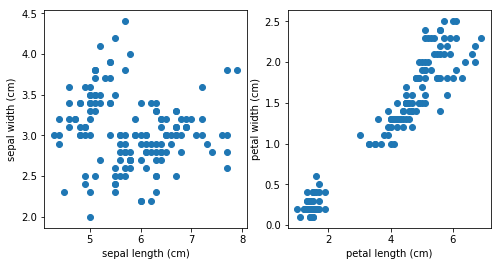

In [81]:
import matplotlib.pylab as plt

plt.figure(figsize=(8,4))
for i in range(2):
    plt.subplot(1,2,i+1 )
    plt.scatter(iris_dataset.data[:,i*2], iris_dataset.data[:,i*2+1])
    plt.xlabel(iris_dataset.feature_names[i*2])
    plt.ylabel(iris_dataset.feature_names[i*2+1])


### 히스토그램(histogram)
* 구간별 빈도수

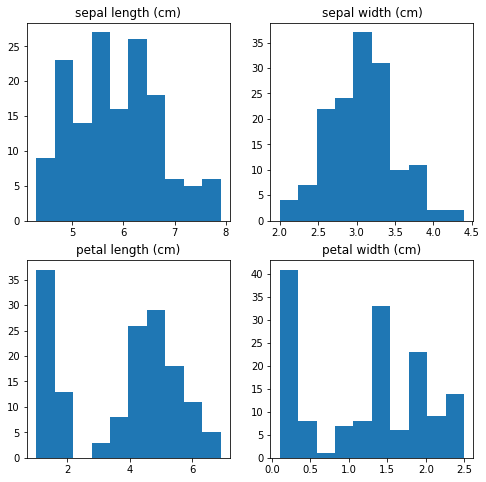

In [82]:
import matplotlib.pylab as plt

plt.figure(figsize=(8,8))
for i in range(4) :
    plt.subplot(2,2,i+1 )
    plt.hist(iris_dataset.data[:,i])
    plt.title(iris_dataset.feature_names[i])
    

### 산점도 행렬(scatter matrix)
* 모든 특성을 짝지어 만든 산점도
* 모든 특성간의 관계 표현 어렵다.
* 가로(x)축과 세로(y)축이 만나는 지점에 두 축간 특성 데이타로 산점도 표시
* 같은 특성이 만나는 지점에 histogram(히스토그램) 표시

### 산점도 행렬 예시

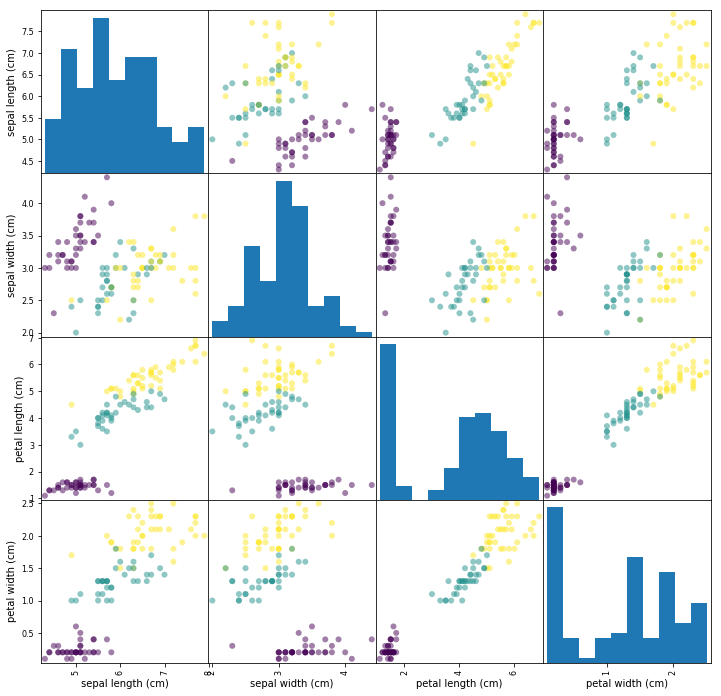

In [83]:
%matplotlib inline
_ = pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(12,12), marker='o')

### 막대 그래프
* 클래스별 데이타 분포 및 형태
* 클래스별 샘플 갯수

<BarContainer object of 3 artists>

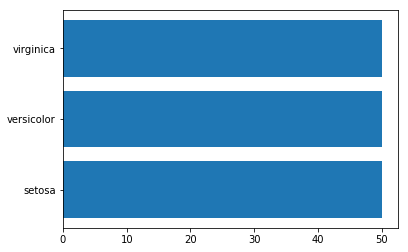

In [84]:
import numpy as np
cnt, bins = np.histogram(iris_dataset.target, bins=len(iris_dataset.target_names))
plt.barh(iris_dataset.target_names, cnt)

### 막대 그래프 예제(1)
* 붓꽃 품종(클래스)별 데이타 분류
* 클래스 컬럼 데이타 추가
    * `df['column'] = new_column`
    * numpy facy indexing

In [92]:
iris_df['class'] = iris_dataset.target_names[iris_dataset.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 막대 그래프 예제(2)
* 클래스별 평균 데이타 구하기
    * `df.groupby(['group'])`
    * `df.mean()` 또는 `df.apply(np.mean)`

In [106]:
mean_by_class = iris_df.groupby(['class']).mean()
#mean_by_class = iris_df.groupby(['class']).apply(np.mean)
mean_by_class

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
class,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### 막대 그래프 예제(3)
* 클래스별 평균 막대 그래프

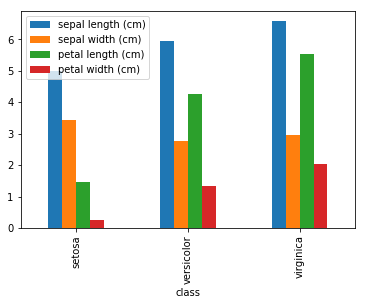

In [104]:
mean_by_class.plot(kind='bar')